In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
df = pd.read_excel("/content/EnergyEfficiency.xlsx")

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df.rename(columns={'X1': 'RelCompactness', 'X2': 'SurfaceArea','X3': 'WallArea', 'X4': 'RoofArea', 'X5': 'OverallHeight','X6': 'Orientation',
                   'X7': 'GlazingArea', 'X8': 'GlazingAreaDist','Y1': 'HeatingLoad', 'Y2': 'CoolingLoad'}, inplace=True)


In [ ]:
df.head()

,RelCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDist,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


array([[<Axes: xlabel='RelCompactness', ylabel='RelCompactness'>,
        <Axes: xlabel='SurfaceArea', ylabel='RelCompactness'>,
        <Axes: xlabel='WallArea', ylabel='RelCompactness'>,
        <Axes: xlabel='RoofArea', ylabel='RelCompactness'>,
        <Axes: xlabel='OverallHeight', ylabel='RelCompactness'>,
        <Axes: xlabel='Orientation', ylabel='RelCompactness'>,
        <Axes: xlabel='GlazingArea', ylabel='RelCompactness'>,
        <Axes: xlabel='GlazingAreaDist', ylabel='RelCompactness'>,
        <Axes: xlabel='HeatingLoad', ylabel='RelCompactness'>,
        <Axes: xlabel='CoolingLoad', ylabel='RelCompactness'>],
       [<Axes: xlabel='RelCompactness', ylabel='SurfaceArea'>,
        <Axes: xlabel='SurfaceArea', ylabel='SurfaceArea'>,
        <Axes: xlabel='WallArea', ylabel='SurfaceArea'>,
        <Axes: xlabel='RoofArea', ylabel='SurfaceArea'>,
        <Axes: xlabel='OverallHeight', ylabel='SurfaceArea'>,
        <Axes: xlabel='Orientation', ylabel='SurfaceArea'>,
       

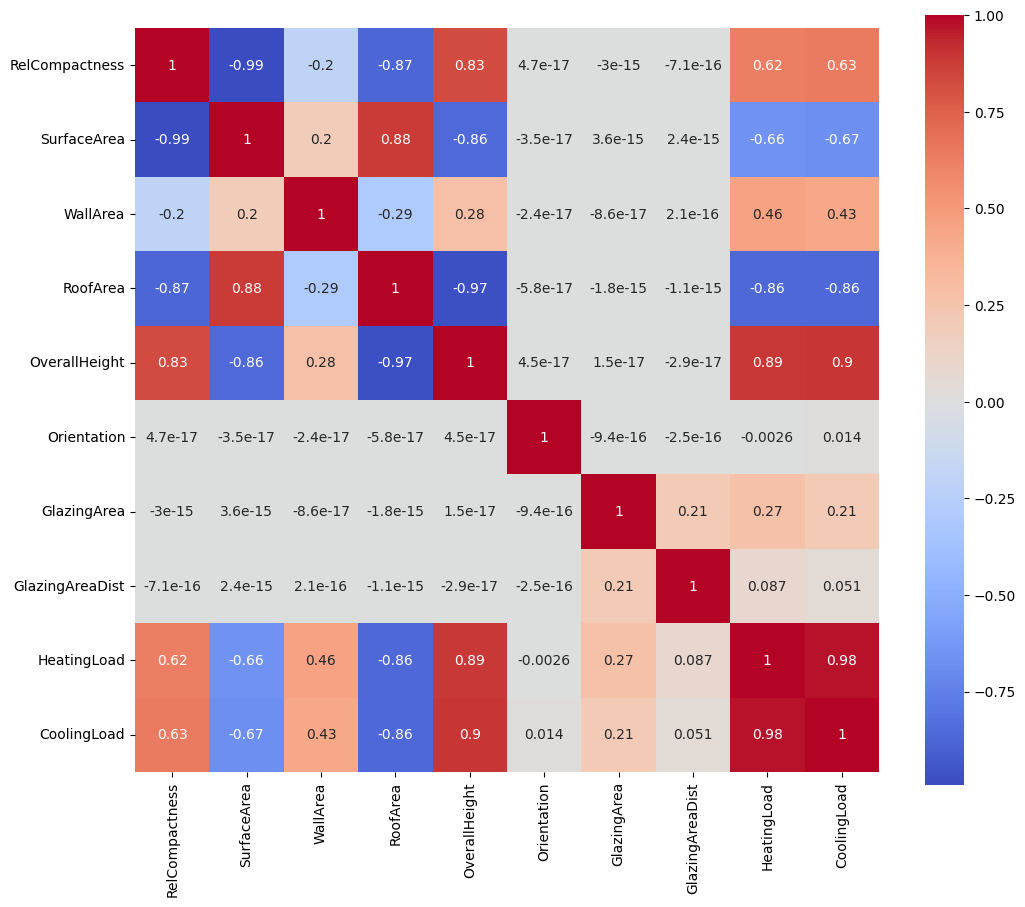

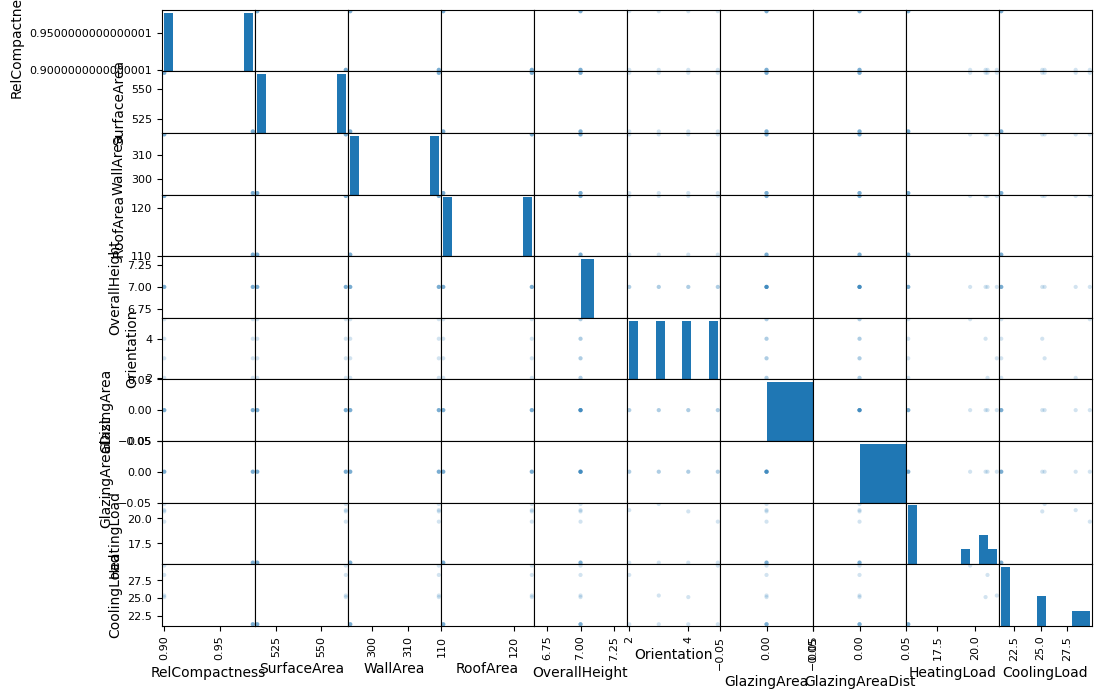

In [ ]:
"""**Correlation of Features - Feature Selection**"""

import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),vmax=1, square=True, annot=True,cmap='coolwarm')
#plt.savefig('pearsoncorr', dpi=1080)

from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(df[0:8],alpha=0.2,figsize = (12,8))

<Figure size 1200x1000 with 0 Axes>

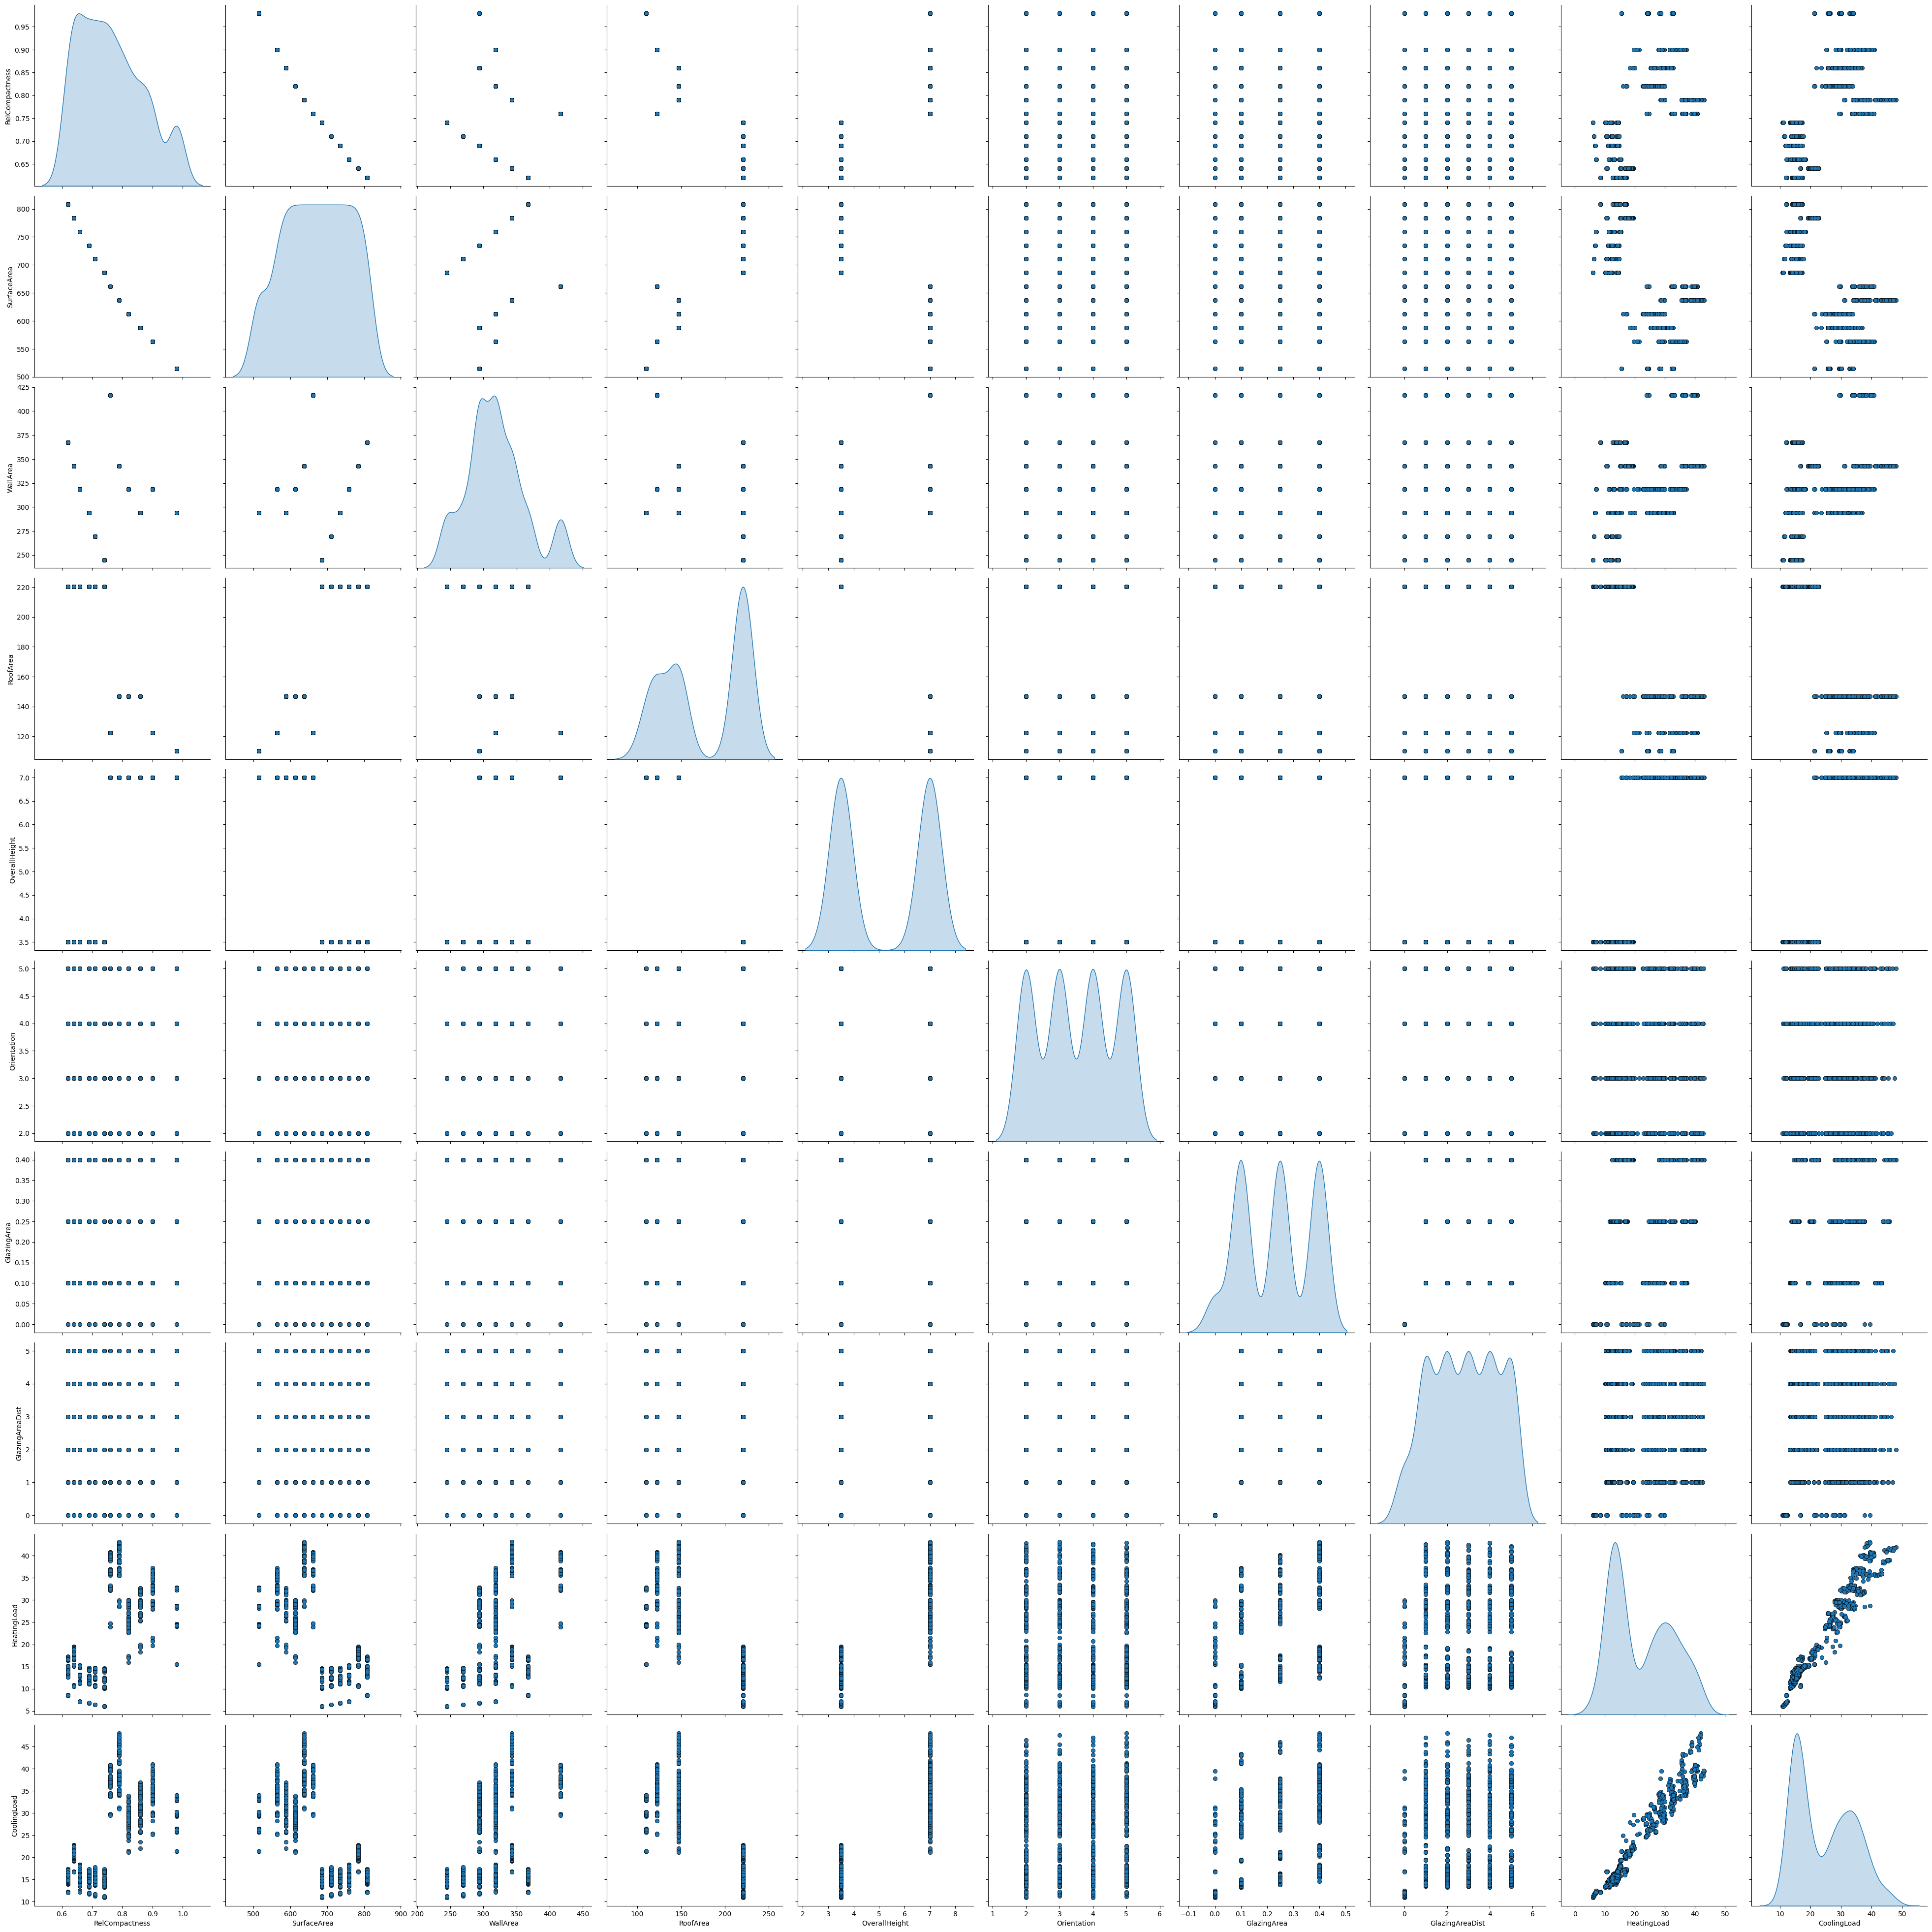

In [ ]:
"""**Histogram of Feature - Distribution**"""

import seaborn as sns
plt.figure(figsize=(12,10))
sns.pairplot(df,diag_kind = 'kde',plot_kws = {'edgecolor': 'k'}, size = 4)
plt.show()


In [ ]:
"""**Feature Engineering**"""

dfheat = pd.DataFrame(df, columns = df.columns)
dfheat.drop(['CoolingLoad'], axis=1, inplace=True)

dfheat.info()

dfcool = pd.DataFrame(df, columns = df.columns)
dfcool.drop(['HeatingLoad'], axis=1, inplace=True)

dfcool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RelCompactness   768 non-null    float64
 1   SurfaceArea      768 non-null    float64
 2   WallArea         768 non-null    float64
 3   RoofArea         768 non-null    float64
 4   OverallHeight    768 non-null    float64
 5   Orientation      768 non-null    int64  
 6   GlazingArea      768 non-null    float64
 7   GlazingAreaDist  768 non-null    int64  
 8   HeatingLoad      768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RelCompactness   768 non-null    float64
 1   SurfaceArea      768 non-null    float64
 2   WallArea         768 non-null    float64
 3   

In [ ]:
"""**Removal of Insignificant Features**"""

dfheat.drop(['SurfaceArea','RoofArea','Orientation'], axis=1, inplace=True)
dfheat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RelCompactness   768 non-null    float64
 1   WallArea         768 non-null    float64
 2   OverallHeight    768 non-null    float64
 3   GlazingArea      768 non-null    float64
 4   GlazingAreaDist  768 non-null    int64  
 5   HeatingLoad      768 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 36.1 KB


In [ ]:
"""**Data Splitting - Holdout Partition**"""

y = dfheat['HeatingLoad'].copy()
X = pd.DataFrame(dfheat, columns=dfheat.columns)
X.drop(['HeatingLoad'], axis=1, inplace=True)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [ ]:
"""**Import Libraries for Machine Learning A;gorithms**"""

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

reg1=SVR(kernel='linear')
reg1.fit(X_train,y_train)

y_pred=reg1.predict(X_test)

In [ ]:
"""**Statistical Measures**"""

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score
from sklearn.metrics import mean_squared_error

mae=mean_absolute_error(y_test,y_pred)
mae

r2err=r2_score(y_test,y_pred)
r2err


0.8976562236301403

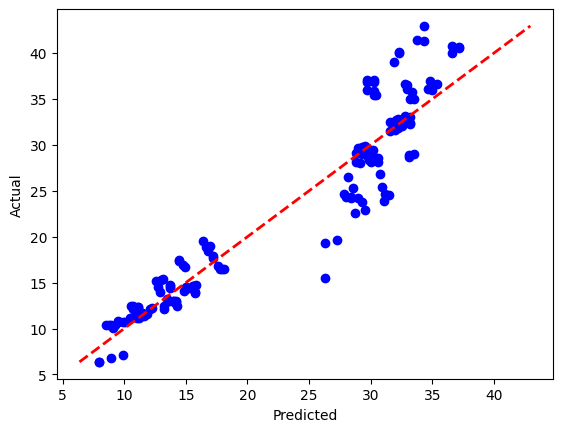

In [ ]:
"""**Plotting of Results**"""

import matplotlib.pyplot as plt

plt.scatter(y_pred,y_test,color='blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
num_folds = 10
seed = 7
scoring = 'r2'


In [ ]:

"""**Data Preprocessing - Z-Score Normalization**"""

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

Best: 0.980999 using {'n_neighbors': np.int64(1)}
0.980999 (0.012759) with: {'n_neighbors': np.int64(1)}
0.938633 (0.006198) with: {'n_neighbors': np.int64(3)}
0.928084 (0.003883) with: {'n_neighbors': np.int64(5)}
0.940339 (0.002497) with: {'n_neighbors': np.int64(7)}
0.938057 (0.005142) with: {'n_neighbors': np.int64(9)}
0.932839 (0.002326) with: {'n_neighbors': np.int64(11)}
0.926292 (0.002947) with: {'n_neighbors': np.int64(13)}
0.919295 (0.003156) with: {'n_neighbors': np.int64(15)}
0.915392 (0.002205) with: {'n_neighbors': np.int64(17)}
0.913970 (0.003029) with: {'n_neighbors': np.int64(19)}
0.913308 (0.003136) with: {'n_neighbors': np.int64(21)}
Training Results
MAE 0.26332247557003263
MSE 0.2431224755700326
RMSE 0.4930745132026524
R-Square 0.997591031995881
Testing Results
MAE 0.4822987012987015
MSE 0.5612462077922084
RMSE 0.7491636722320486
R-Square 0.9946154347610382


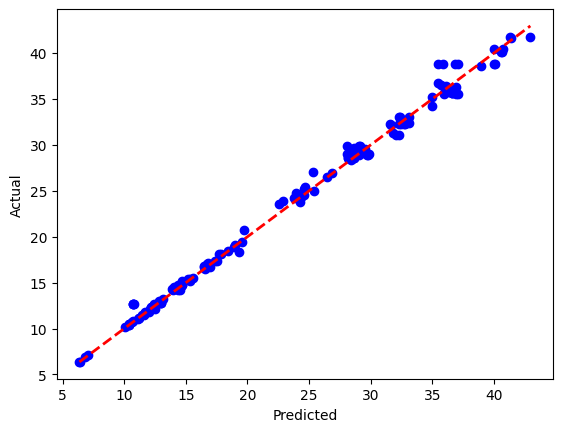

In [ ]:
"""##KNN"""

k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=3, random_state=42,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train, y_train)
#Training Data
print("Training Results")
knnpredtr = model.predict(X_train)
print("MAE",mean_absolute_error(y_train, knnpredtr))
print("MSE",mean_squared_error(y_train, knnpredtr))
print("RMSE",np.sqrt(mean_squared_error(y_train, knnpredtr)))
r2 = r2_score(y_train, knnpredtr)
print("R-Square",r2)
#Testing Data
print("Testing Results")
knnpred = model.predict(X_test)
print("MAE",mean_absolute_error(y_test, knnpred))
print("MSE",mean_squared_error(y_test, knnpred))
print("RMSE",np.sqrt(mean_squared_error(y_test, knnpred)))
r2 = r2_score(y_test, knnpred)
print("R-Square",r2)

plt.scatter(y_test, knnpred,color='blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Best: 0.945444 using {'C': np.float64(4.0), 'epsilon': np.float64(1.0)}
0.919874 (0.006718) with: {'C': np.float64(1.0), 'epsilon': np.float64(0.5)}
0.918061 (0.004791) with: {'C': np.float64(1.0), 'epsilon': np.float64(1.0)}
0.907104 (0.002161) with: {'C': np.float64(1.0), 'epsilon': np.float64(2.0)}
0.932421 (0.003304) with: {'C': np.float64(1.5), 'epsilon': np.float64(0.5)}
0.930676 (0.002554) with: {'C': np.float64(1.5), 'epsilon': np.float64(1.0)}
0.920401 (0.001297) with: {'C': np.float64(1.5), 'epsilon': np.float64(2.0)}
0.937741 (0.002623) with: {'C': np.float64(2.0), 'epsilon': np.float64(0.5)}
0.936197 (0.002079) with: {'C': np.float64(2.0), 'epsilon': np.float64(1.0)}
0.926461 (0.000642) with: {'C': np.float64(2.0), 'epsilon': np.float64(2.0)}
0.941803 (0.002416) with: {'C': np.float64(3.0), 'epsilon': np.float64(0.5)}
0.941939 (0.001852) with: {'C': np.float64(3.0), 'epsilon': np.float64(1.0)}
0.933991 (0.000974) with: {'C': np.float64(3.0), 'epsilon': np.float64(2.0)}
0.94

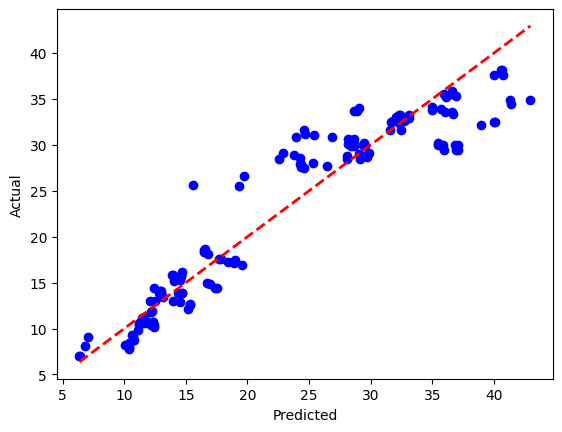

In [ ]:
"""##SVM"""

cval= np.array([1.0,1.5,2,3,3.5,4.0])
epsval=np.array([0.5,1.0,2.0])
#kernelval=['rbf','linear']
#kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1
param_grid = dict(C=cval,epsilon=epsval)
model = SVR()
kfold = KFold(n_splits=3, random_state=42,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

model = SVR(C= 4.0, epsilon= 1.0, kernel= 'linear')
model.fit(X_train, y_train)
#Training Data
print("Training Results")
svrpredtr = model.predict(X_train)
print("MAE",mean_absolute_error(y_train, svrpredtr))
print("MSE",mean_squared_error(y_train, svrpredtr))
print("RMSE",np.sqrt(mean_squared_error(y_train, svrpredtr)))
r2 = r2_score(y_train, svrpredtr)
print("R-Square",r2)
#Testing Data
print("Testing Results")
svrpred = model.predict(X_test)
print("MAE",mean_absolute_error(y_test, svrpred))
print("MSE",mean_squared_error(y_test, svrpred))
print("RMSE",np.sqrt(mean_squared_error(y_test, svrpred)))
r2 = r2_score(y_test, svrpred)
print("R-Square",r2)

plt.scatter(y_test, svrpred,color='blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Best: 0.996803 using {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 80}
nan (nan) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 20}
nan (nan) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 40}
nan (nan) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 60}
nan (nan) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 80}
nan (nan) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 20}
nan (nan) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 40}
nan (nan) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 60}
nan (nan) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 80}
nan (nan) with: {'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 6, 'n_e

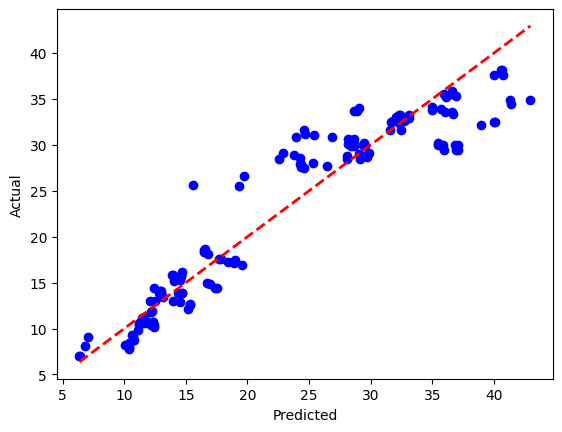

In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': range(20, 100, 20),
    'max_depth': range(2, 40, 2),
    'min_samples_split': range(2, 20, 2),
    'max_features': ["auto", "sqrt", "log2"],
}

model= RandomForestRegressor(random_state=42)
kfold = KFold(n_splits=3, random_state=42,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

model = RandomForestRegressor(max_depth=8, max_features='log2', min_samples_split=2, n_estimators= 80)
model.fit(X_train, y_train)
#Training Data
print("Training Results")
rfpredtr = model.predict(X_train)
print("MAE",mean_absolute_error(y_train, rfpredtr))
print("MSE",mean_squared_error(y_train, rfpredtr))
print("RMSE",np.sqrt(mean_squared_error(y_train, rfpredtr)))
r2 = r2_score(y_train, rfpredtr)
print("R-Square",r2)
#Testing Data
print("Testing Results")
rfpred = model.predict(X_test)
print("MAE",mean_absolute_error(y_test, rfpred))
print("MSE",mean_squared_error(y_test, rfpred))
print("RMSE",np.sqrt(mean_squared_error(y_test, rfpred)))
r2 = r2_score(y_test, rfpred)
print("R-Square",r2)

plt.scatter(y_test, svrpred,color='blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()